# **CAPSTONE PROJECT 2 - SUPERMARKET CAMPAIGN**

## **Latar Belakang**

##### Pernyataan Masalah
___

Dataset Supermarket berikut merupakan dataset customer yang memiliki filed demografi, customer behavior dan rekam campaign beberawa waktu terakhir. Pada data ini terlihat element utuk membentuk segmentasi customer melalui representasi intensitas pembelian, daya beli dan rentang waktu pembelian terakhir. Segementasi tersebut diharapkan dapat menggambarkan karakteristik customer dan Stakeholder dapat menentukan strategi apa yang tepat untuk kebutuhan campaign berikutnya. Element lainnya sebagai pendukung adalah bangai mana Stakeholder bisa menyalurkan strategi dan rekomendasi yang didapatkan nantinya melalui analisa data channel penjualan yang sudah ada. Semua elemet diatas akan dianalisa berdasarkan data demografi setiap customer baik dari Pendidikan, Status Perkawinan, Besar Keluarga dan Income. Pernyataan masalah dan Objective dari analisa yang akan dilakukan adalah:<br><br>
- Klasifikasi Customer mana saja yang memerlukan perhatian untuk meningkatkan scoring segmentasi customer
- Channel apa yang harus difokuskan untuk campaign selanjutnya
- Cara apa yang paling tepat untuk menigkatkan customer behavior menjadi lebih baik

## **Import & Rows/Columns Setting**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, f_oneway, normaltest
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')

## **Load Dataset**

In [4]:
dfmcRaw = pd.read_csv('Supermarket Customers.csv',sep='\t')
dfmcRaw

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


### *`Data Info and Describe`*

In [5]:
# Info

dfmcRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Dataset berikut ini merupakan data customer supermarket yang menunjukan demografi customer dan record pembelian.<br>
Data berikut terdiri dari 2240 baris dan 29 kolom, yaitu:
- ID: Customer ID
- Year_Birth: Tahun lahir
- Education: Pendidikan terakhir
- Marital_Status: Status pernikahan
- Income: Pendapatan
- Kidhome: Jumlah anak
- Teenhome: Jumlah remaja
- Dt_Customer: Tanggal membership
- Recency: Total hari dari transaksi terakhir
- MntWines: Total belanja untuk wine dalam 2 tahun terakhir
- MntFruits: Total belanja untuk buah dalam 2 tahun terakhir
- MntMeatProducts: Total belanja untuk daging dalam 2 tahun terakhir
- MntFishProducts: Total belanja untuk ikan dalam 2 tahun terakhir
- MntSweetProducts: Total belanja untuk produk manis dalam 2 tahun terakhir
- MntGoldProds: Total belanja untuk emas dalam 2 tahun terakhir
- NumDealsPurchases: Total pembelian dengan discount
- NumWebPurchases: Total pembelian melalui website
- NumCatalogPurchases: Total pembelian menggunakan katalog
- NumStorePurchases: Total pembelian melalui store
- NumWebVisitsMonth: Total kunjungan pada website
- AcceptedCmp1: Campaign 1
- AcceptedCmp2: Campaign 2
- AcceptedCmp3: Campaign 3
- AcceptedCmp4: Campaign 4
- AcceptedCmp5: Campaign 5
- Complain: Komplain dalam 2 tahun terakhir
- Z_CostContact: - 
- Z_Revenue: - 
- Response: Campaign terakhir

## **Data Cleansing**

Pada tahapan ini, akan dilakukan peninjauan setiap kolom pada data untuk menemukan apakah ada data yang berupa anomali, outliers, atau pun data kosong

### *`Unique Values`*

In [6]:
pd.set_option('display.max_colwidth', -1)
# data uniq di tiap kolom

listItem = []
for i in dfmcRaw.columns :
    listItem.append( [i, dfmcRaw[i].nunique(), dfmcRaw[i].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

Diatas ini adalah table untuk melihat uniq value apa saja yang ada pada setiap kolom

### *`Isna dan Fillna`*

#### Isna Sum


In [7]:
# Isna All Data

dfmcRaw.isna().sum()

ID                     0 
Year_Birth             0 
Education              0 
Marital_Status         0 
Income                 24
Kidhome                0 
Teenhome               0 
Dt_Customer            0 
Recency                0 
MntWines               0 
MntFruits              0 
MntMeatProducts        0 
MntFishProducts        0 
MntSweetProducts       0 
MntGoldProds           0 
NumDealsPurchases      0 
NumWebPurchases        0 
NumCatalogPurchases    0 
NumStorePurchases      0 
NumWebVisitsMonth      0 
AcceptedCmp3           0 
AcceptedCmp4           0 
AcceptedCmp5           0 
AcceptedCmp1           0 
AcceptedCmp2           0 
Complain               0 
Z_CostContact          0 
Z_Revenue              0 
Response               0 
dtype: int64

In [8]:
dfmcRaw[dfmcRaw['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


Dari hasil diatas terlihat ada data kosong pada kolom Income, data tersebut akan dilihat dan dipertimbangkan untuk diisi dengan rata-rata income sesuai dengan klasifikasi tingkat pendidikannya

#### Normal distribution test

In [9]:
# Normal dist test
p_value = normaltest(dfmcRaw['Income'])

# Print P-Value
print("P-value:", p_value[1])

P-value: nan


Dari hasil normal test menunjukan P-Value 0.0 yang berarti distribusi untuk variable Income tidaklah berdistribusi normal. Oleh sebab itu penarikan nilai tengah untuk Incom digunakan denan mengambil median dari Income dari setiap Edukasi

Text(0.5, 1.0, 'Education Income')

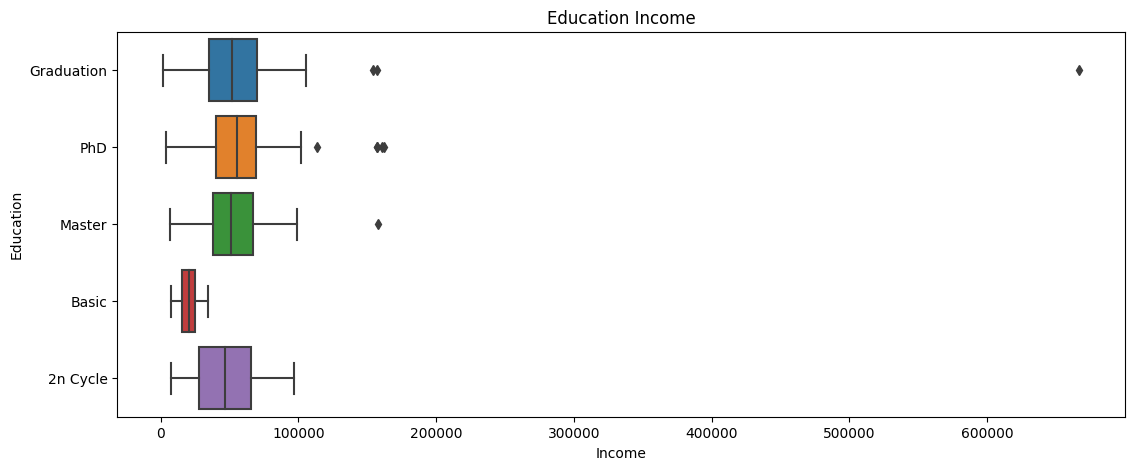

In [10]:
# Box Plot Education

plt.figure(figsize=(13,5))

sns.boxplot(data = dfmcRaw, x='Income',y='Education')

plt.title('Education Income')

Dari hasi boxplot menunjukan adanya extreme outliers pada kolom Education dengan kategori Graduation, dari hasil tersebut value extreme outlier tersebut akan digantikan dengan median setelah extreme outliers dihilangkan dengan penghitungan IQR

#### Extreme Outlier

In [11]:
Q1 = dfmcRaw['Income'].quantile(0.25)
Q3 = dfmcRaw['Income'].quantile(0.75)
IQR = Q3 - Q1

#treshhold
treshhold = 3 * IQR

# Indentify Outliers
outliersI = (dfmcRaw['Income'] < Q1 - treshhold) | (dfmcRaw['Income'] > Q3 + treshhold)

# Extreme Outliers Value
outlier_values = dfmcRaw.loc[outliersI,'Income']
print(f'Outlier: {outlier_values}')



Outlier: 2233    666666.0
Name: Income, dtype: float64


Hasil penghitungan dengan IQR menunjukan adanya outlier yang diindikasi datanya tidak sesuai dengan pola data lainnya, maka dari itu data tersebut akan digantikan degan **median Income tanpa outlier** tersebut

#### Median of Education Income

In [12]:
medianInG = dfmcRaw[dfmcRaw['Education']=='Graduation']['Income'].drop(2233).median()
medianInP = dfmcRaw[dfmcRaw['Education']=='PhD']['Income'].median()
medianInM = dfmcRaw[dfmcRaw['Education']=='Master']['Income'].median()
medianIn2 = dfmcRaw[dfmcRaw['Education']=='2n Cycle']['Income'].median()
medianInB = dfmcRaw[dfmcRaw['Education']=='Basic']['Income'].median()
display(medianInG, medianInP, medianInM, medianIn2, medianInB)

51983.0

55212.0

50943.0

46805.0

20744.0

Diatas ini merupakan perhitungan Median dari setiap kategori Education, dengan kondisi penghitungan kategori Graduation menghilangkan extreme outlier

#### Replace Extreme Outlier

In [13]:
dfmcRaw.at[2233,'Income'] = medianInG
dfmcRaw.iloc[[2233]]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,51983.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


#### Fillna in Income

In [14]:
# Fillna Income

dfmcRaw.loc[dfmcRaw['Education'] == 'Graduation', 'Income'] = dfmcRaw.loc[dfmcRaw['Education'] == 'Graduation', 'Income'].fillna(medianInG)
dfmcRaw.loc[dfmcRaw['Education'] == 'PhD', 'Income'] = dfmcRaw.loc[dfmcRaw['Education'] == 'PhD', 'Income'].fillna(medianInP)
dfmcRaw.loc[dfmcRaw['Education'] == 'Master', 'Income'] = dfmcRaw.loc[dfmcRaw['Education'] == 'Master', 'Income'].fillna(medianInM)
dfmcRaw.loc[dfmcRaw['Education'] == '2n Cycle', 'Income'] = dfmcRaw.loc[dfmcRaw['Education'] == '2n Cycle', 'Income'].fillna(medianIn2)
dfmcRaw.loc[dfmcRaw['Education'] == 'Basic', 'Income'] = dfmcRaw.loc[dfmcRaw['Education'] == 'Basic', 'Income'].fillna(medianInB)

In [15]:
dfmcRaw.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


Pada kolom Income yang kosong ditahap ini digantikan dengan median sesuai kategori edukasi masing-masing customer

### *`Drop Columns`*

Pada tahapan ini dilakukan penghapusan kolom Z_CostContact	dan Z_Revenue dikarenakan kedua kolom tersebut tidak memiliki keterangan yang memiliki korelasi dengan kolom lainnya, jadi diasumsikan untuk analisa yang dibutuhkan saat ini tidak memerlukan kolom tersebut.

In [16]:
dfmcRaw.drop(columns='Z_CostContact',axis=1,inplace=True)
dfmcRaw.drop(columns='Z_Revenue',axis=1,inplace=True)

### *`Date Format`*

Pada dataset ini kolom date masih dalam data type object dan akan dirubah ke data type datetime untuk mempermudah proses pengolahan data jika dibutuhkan

In [17]:
dfmcRaw['Dt_Customer'] = pd.to_datetime(dfmcRaw['Dt_Customer'])
dfmcRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### *`Marital Status Correction`*

In [18]:
dfmcRaw['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow       77 
Alone       3  
Absurd      2  
YOLO        2  
Name: Marital_Status, dtype: int64

Pada kolom Marital_Status terdapat bebebrapa value yang diasumsikan memiliki kesamaan klasifikasi dengan yang lainnya, yaitu: **Alone, Absurd, YOLO**. kegita value tersebut akan dikategorikan ke dalam kategori **Single**

In [19]:
def maritalCorrection(x):
    if x['Marital_Status'] == 'Alone':
        return 'Single'
    elif x['Marital_Status'] == 'Absurd':
        return 'Single'
    elif x['Marital_Status'] == 'YOLO':
        return 'Single'
    else:
        return x['Marital_Status']

dfmcRaw['Marital_Status'] = dfmcRaw.apply(maritalCorrection, axis=1)
dfmcRaw['Marital_Status'].value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow       77 
Name: Marital_Status, dtype: int64

## **Data Preparation**

### *`Add Total Spent`*

Menjumlahkan kolom monetasi dari setiap kategori produk untuk mengetahui total angka pembelanjaan dari setiap customer

In [20]:
dfmcRaw['TotalSpend'] = dfmcRaw['MntWines'] + dfmcRaw['MntFruits'] +  dfmcRaw['MntMeatProducts'] + dfmcRaw ['MntFishProducts'] + dfmcRaw ['MntSweetProducts'] + dfmcRaw['MntGoldProds']
dfmcRaw.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpend
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422


### *`Add Purchase Freq`*

Menjumlahkan purchase method (web, catalog, store) untuk mengetahui total berapa kali pembelian dari setiap customer

In [21]:
dfmcRaw['PurchaseFreq'] = dfmcRaw['NumWebPurchases'] + dfmcRaw['NumCatalogPurchases'] + dfmcRaw['NumStorePurchases']

In [22]:
dfmcRaw.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpend,PurchaseFreq
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,22
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,20
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,6
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,14


### *`Add Income Category`*

Income pada dataset ini diklasifikasikan sesuai kategori yang disesuaikan dari sumber berikut (https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system#:~:text=One%20objective%20way%20some%20researchers,upper%2Dmiddle%20class%20and%20wealthy.)<br>
Klasifikasi dibagi menjadi 3
- Upper: Income diatas $156,600
- Middle: Income direntang $52,200 - $156,600
- Lower: Income dibawah $52,200

In [23]:
# Max and min Value

print(f"Max: {dfmcRaw['Income'].max()}\nMin: {dfmcRaw['Income'].min()}")


Max: 162397.0
Min: 1730.0


In [24]:
def incomeCategory(x):
    if x['Income'] > 156600:
        return 'Upper'
    elif x['Income'] > 52199:
        return 'Middle'
    else:
        return 'Lower'

dfmcRaw['IncomeCategory'] = dfmcRaw.apply(incomeCategory, axis=1)
dfmcRaw

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpend,PurchaseFreq,IncomeCategory
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,22,Middle
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,4,Lower
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,20,Middle
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,6,Lower
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,14,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1341,16,Middle
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,444,15,Middle
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,1241,18,Middle
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,843,21,Middle


### *`Add Age Category`*

Income pada dataset ini diklasifikasikan sesuai kategori yang disesuaikan dari sumber berikut (https://www.researchgate.net/figure/Generation-Classification-and-Typical-Behaviours-Associated-with-the-Generation_tbl1_327893786)
- Silent Gen: sebelum **1946**
- Baby Boomers: **1946** sampai **1964**
- Gen X: **1965** sampai **1981**
- Millenials: **1982** sampai **2000**
- Gen Z: **2001** sampai sekarang

In [25]:
def ageCategory(x):
    if x['Year_Birth'] < 1946:
        return 'Silent Gen'
    elif x['Year_Birth'] < 1965:
        return 'Baby Boomers'
    elif x['Year_Birth'] < 1982:
        return 'Gen X'
    elif x['Year_Birth'] < 2001:
        return 'Millenials'
    elif x['Year_Birth'] > 2000 :
        return 'Gen Z'
    else:
        return 'Other'
    
dfmcRaw['Generation'] = dfmcRaw.apply(ageCategory, axis=1)
dfmcRaw

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpend,PurchaseFreq,IncomeCategory,Generation
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,22,Middle,Baby Boomers
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,4,Lower,Baby Boomers
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,20,Middle,Gen X
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,6,Lower,Millenials
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,14,Middle,Gen X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1341,16,Middle,Gen X
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,444,15,Middle,Baby Boomers
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,1241,18,Middle,Gen X
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,843,21,Middle,Baby Boomers


In [26]:
dfmcRaw['Generation'].value_counts()

Gen X           1108
Baby Boomers    759 
Millenials      346 
Silent Gen      27  
Name: Generation, dtype: int64

### *`Add Total Household & Category`*

Kolom ini merepresentasikan jumlah anggota rumah dengan menjumlahkan anak dengan marital status, dengan asumsi kategori married dan together terhitung secara default 2 orang dan kategori single divorced dan widow adalah 1 orang, yang akan dijumlahkan dengan kolom kid dan teen

In [27]:
def totalHoushold(x):
    if x['Marital_Status'] == 'Married':
        return 2
    elif x['Marital_Status'] == 'Together':
        return 2
    elif x['Marital_Status'] == 'Single':
        return 1
    elif x['Marital_Status'] == 'Divorced':
        return 1
    elif x['Marital_Status'] == 'Widow':
        return 1
    else:
        return 0
    
dfmcRaw['TotalHousehold'] = dfmcRaw.apply(totalHoushold, axis=1)
dfmcRaw['TotalHousehold'] = dfmcRaw['TotalHousehold'] + dfmcRaw['Kidhome'] + dfmcRaw['Teenhome']
dfmcRaw.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpend,PurchaseFreq,IncomeCategory,Generation,TotalHousehold
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,22,Middle,Baby Boomers,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,4,Lower,Baby Boomers,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,20,Middle,Gen X,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,6,Lower,Millenials,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,14,Middle,Gen X,3


### *`Add Total Campaign Participation`*

Menambahkan setiap hitungan parstisipasi campaign untuk mengetahui customer mana saja yang pernah / tidak dan sering / jarang mengikuti campaign

In [28]:
dfmcRaw['CampPrtcpn'] = dfmcRaw['AcceptedCmp3'] + dfmcRaw['AcceptedCmp4'] + dfmcRaw['AcceptedCmp5'] + dfmcRaw['AcceptedCmp1'] + dfmcRaw['AcceptedCmp2'] + dfmcRaw['Response']
dfmcRaw.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpend,PurchaseFreq,IncomeCategory,Generation,TotalHousehold,CampPrtcpn
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,22,Middle,Baby Boomers,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,4,Lower,Baby Boomers,3,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,20,Middle,Gen X,2,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,6,Lower,Millenials,3,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,14,Middle,Gen X,3,0


### *`RFM scoring`*

RFM Scoring dibuat berdasarkan elemen yang sudah ada pada data frame yaitu Recency, Frequency dari totoal pruchase frequency dari masing-masing channel dan Monetary atau total spend setiap customer. Tujuan dibentuknya socring RFM ini adalah untuk mengetahui **segmentasi customer.**

In [29]:
# Create RFM dataframe

rfm = dfmcRaw[['ID','Recency','PurchaseFreq','TotalSpend']]
rfm

,ID,Recency,PurchaseFreq,TotalSpend
0,5524,58,22,1617
1,2174,38,4,27
2,4141,26,20,776
3,6182,26,6,53
4,5324,94,14,422
...,...,...,...,...
2235,10870,46,16,1341
2236,4001,56,15,444
2237,7270,91,18,1241
2238,8235,8,21,843


In [30]:
# Adding RFM Score

rfm['RScore'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['FScore'] = pd.qcut(rfm['PurchaseFreq'], 5, labels=[1,2,3,4,5])
rfm['MScore'] = pd.qcut(rfm['TotalSpend'], 5, labels=[1,2,3,4,5])

rfm


,ID,Recency,PurchaseFreq,TotalSpend,RScore,FScore,MScore
0,5524,58,22,1617,3,5,5
1,2174,38,4,27,4,1,1
2,4141,26,20,776,4,4,4
3,6182,26,6,53,4,2,1
4,5324,94,14,422,1,3,3
...,...,...,...,...,...,...,...
2235,10870,46,16,1341,3,4,5
2236,4001,56,15,444,3,3,3
2237,7270,91,18,1241,1,4,5
2238,8235,8,21,843,5,5,4


Pada tahapan ini dilakukan binning minggunakan qcut untuk mengklasifikasikan scoring tertinggi (5) hingga terendah (1) dengan menentukan qcut sebesar 5 kategori
- **Recency** : angka recency yang rendah akan mendapat score tertinggi
- **Frequency** : angka frequency yang tinggi akan mendapatkan score tertinggi
- **Monetary** : angka monetary yang tinggi akan mendapatkan score tertinggi

In [31]:
# Combined RF Score

# convert dtype to integer
rfm['RScore'] = rfm['RScore'].astype(int)
rfm['FScore'] = rfm['FScore'].astype(int)
rfm['MScore'] = rfm['MScore'].astype(int)

# RF Calculation
rfm['RFMScore'] = round((rfm['RScore'] + rfm['FScore'] + rfm['MScore']) / 3,1)
rfm

,ID,Recency,PurchaseFreq,TotalSpend,RScore,FScore,MScore,RFMScore
0,5524,58,22,1617,3,5,5,4.3
1,2174,38,4,27,4,1,1,2.0
2,4141,26,20,776,4,4,4,4.0
3,6182,26,6,53,4,2,1,2.3
4,5324,94,14,422,1,3,3,2.3
...,...,...,...,...,...,...,...,...
2235,10870,46,16,1341,3,4,5,4.0
2236,4001,56,15,444,3,3,3,3.0
2237,7270,91,18,1241,1,4,5,3.3
2238,8235,8,21,843,5,5,4,4.7


In [32]:
# Score Value Count

rfm['RFMScore'].value_counts().sort_index()

1.0    81 
1.3    106
1.7    184
2.0    192
2.3    242
2.7    194
3.0    236
3.3    217
3.7    280
4.0    189
4.3    163
4.7    131
5.0    25 
Name: RFMScore, dtype: int64

### *`RFM Merging`*

Pada tahapan ini scoring RFM akan disatukan kembali ke dataframe utama

In [33]:
dfmcRaw = dfmcRaw.merge(rfm[['ID', 'RFMScore']], on='ID')
dfmcRaw.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpend,PurchaseFreq,IncomeCategory,Generation,TotalHousehold,CampPrtcpn,RFMScore
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,22,Middle,Baby Boomers,1,1,4.3
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,4,Lower,Baby Boomers,3,0,2.0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,20,Middle,Gen X,2,0,4.0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,6,Lower,Millenials,3,0,2.3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,14,Middle,Gen X,3,0,2.3


### *`RFM Segmentation`*

In [34]:
def rfmSegmentation(x):
    if x['RFMScore'] == 5:
        return 'Champions'
    elif x['RFMScore'] > 4:
        return 'Potential Loyalists'
    elif x['RFMScore'] > 3:
        return 'New Cust'
    elif x['RFMScore'] > 2:
        return 'At Risk'
    elif x['RFMScore'] > 0:
        return "Can't Lose Them"
    else:
        return 'Other'
    
dfmcRaw['RFMSegment'] = dfmcRaw.apply(rfmSegmentation, axis=1)
dfmcRaw

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpend,PurchaseFreq,IncomeCategory,Generation,TotalHousehold,CampPrtcpn,RFMScore,RFMSegment
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,22,Middle,Baby Boomers,1,1,4.3,Potential Loyalists
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,4,Lower,Baby Boomers,3,0,2.0,Can't Lose Them
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,20,Middle,Gen X,2,0,4.0,New Cust
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,6,Lower,Millenials,3,0,2.3,At Risk
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,14,Middle,Gen X,3,0,2.3,At Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1341,16,Middle,Gen X,3,0,4.0,New Cust
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,444,15,Middle,Baby Boomers,5,1,3.0,At Risk
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,1241,18,Middle,Gen X,1,1,3.3,New Cust
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,843,21,Middle,Baby Boomers,3,0,4.7,Potential Loyalists


Segmentasi pada RFM berikut ini adalah membagi klasifikasi berdasarkan penghitungan score RFM, yaitu:<br>
urutan dari tertinggi hingga terendah<br>
- **Score 5** ***Champions:*** mereka adalah customer terbaik, yang paling baru membeli, paling sering, dan merupakan pembelanja berat. Perhatian penuh untuk memaintain customer ini. Mereka dapat menjadi pengadopsi awal untuk produk baru dan akan membantu mempromosikan brand supermarket.<br><br>
- **Score 4** ***Potential Loyalists:*** mereka adalah customer yang juga berbelanja dalam waktu dekat ini dengan frekuensi rata-rata dan daya beli yang baik. pertimbangan untuk pawarkan program keanggotaan atau loyalitas atau rekomendasikan produk terkait untuk meningkatkan penjualan mereka dan bantu mereka menjadi kategori Champions.<br><br>
- **Score 3** ***New Customer:*** merekea adalah customer yang memiliki skor RFM keseluruhan yang tinggi tetapi tidak sering berbelanja. Pertimbangan membangun hubungan dengan customer ini dengan memberikan dukungan orientasi dan penawaran khusus untuk meningkatkan kunjungan mereka.<br><br>
- **Score 2** ***At Risk Customers:*** mereka adalah customer yang pernah membeli dan membelanjakan uang dalam jumlah besar, tetapi sudah lama tidak melakukan pembalian. Pertimbangan untuk customer ini dengan program kampanye pengaktifan kembali yang dipersonalisasi untuk terhubung kembali, dan tawarkan pembaruan dan produk bermanfaat untuk mendorong pembelian lagi.<br><br>
- **Score 1** ***Can’t Lose Them:*** merka adalah custoemr yang pernah mengunjungi dan membeli, tetapi belum pernah berkunjung belakangan ini. Bawa mereka kembali dengan promosi yang relevan, dan jalankan survei untuk mencari tahu apa yang salah dan hindari kehilangan mereka karena pesaing.<br><br>

### *`Rename & Rearrange Columns`*

Pada bagian ini akan dilakukan rename pada beberapa kolom agar lebih mudah dalam mengartikan dan pencarian

In [35]:
# Columns Name

dfmcRaw.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'TotalSpend', 'PurchaseFreq',
       'IncomeCategory', 'Generation', 'TotalHousehold', 'CampPrtcpn',
       'RFMScore', 'RFMSegment'],
      dtype='object')

In [36]:
# Rename

dfmcRaw.rename(columns={'Year_Birth': 'BirthYear'},inplace=True)
dfmcRaw.rename(columns={'Marital_Status': 'MaritalStatus'},inplace=True)
dfmcRaw.rename(columns={'Dt_Customer': 'JoinDate'},inplace=True)
dfmcRaw.rename(columns={'NumDealsPurchases': 'DiscPurchases'},inplace=True)
dfmcRaw.rename(columns={'NumWebPurchases': 'WebPurchases'},inplace=True)
dfmcRaw.rename(columns={'NumCatalogPurchases': 'CatalogPurchases'},inplace=True)
dfmcRaw.rename(columns={'NumStorePurchases': 'StorePurchases'},inplace=True)
dfmcRaw.rename(columns={'NumWebVisitsMonth': 'WebVisitsMonth'},inplace=True)
dfmcRaw.rename(columns={'AcceptedCmp3': 'Campaign3'},inplace=True)
dfmcRaw.rename(columns={'AcceptedCmp4': 'Campaign4'},inplace=True)
dfmcRaw.rename(columns={'AcceptedCmp5': 'Campaign5'},inplace=True)
dfmcRaw.rename(columns={'AcceptedCmp1': 'Campaign1'},inplace=True)
dfmcRaw.rename(columns={'AcceptedCmp2': 'Campaign2'},inplace=True)
dfmcRaw.rename(columns={'Response': 'Campaign6'},inplace=True)

# Rearrange

dfMC = dfmcRaw[['ID','BirthYear','Generation','Education','MaritalStatus','Kidhome','Teenhome','TotalHousehold','Income','IncomeCategory','JoinDate','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','TotalSpend',
                'DiscPurchases','WebPurchases','CatalogPurchases','StorePurchases','PurchaseFreq','RFMScore','RFMSegment','WebVisitsMonth','Campaign1','Campaign2','Campaign3','Campaign4','Campaign5','Campaign6','CampPrtcpn','Complain']]

# Cleaned DF

dfMC

,ID,BirthYear,Generation,Education,MaritalStatus,Kidhome,Teenhome,TotalHousehold,Income,IncomeCategory,JoinDate,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalSpend,DiscPurchases,WebPurchases,CatalogPurchases,StorePurchases,PurchaseFreq,RFMScore,RFMSegment,WebVisitsMonth,Campaign1,Campaign2,Campaign3,Campaign4,Campaign5,Campaign6,CampPrtcpn,Complain
0,5524,1957,Baby Boomers,Graduation,Single,0,0,1,58138.0,Middle,2012-04-09,58,635,88,546,172,88,88,1617,3,8,10,4,22,4.3,Potential Loyalists,7,0,0,0,0,0,1,1,0
1,2174,1954,Baby Boomers,Graduation,Single,1,1,3,46344.0,Lower,2014-08-03,38,11,1,6,2,1,6,27,2,1,1,2,4,2.0,Can't Lose Them,5,0,0,0,0,0,0,0,0
2,4141,1965,Gen X,Graduation,Together,0,0,2,71613.0,Middle,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,20,4.0,New Cust,4,0,0,0,0,0,0,0,0
3,6182,1984,Millenials,Graduation,Together,1,0,3,26646.0,Lower,2014-10-02,26,11,4,20,10,3,5,53,2,2,0,4,6,2.3,At Risk,6,0,0,0,0,0,0,0,0
4,5324,1981,Gen X,PhD,Married,1,0,3,58293.0,Middle,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,14,2.3,At Risk,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Gen X,Graduation,Married,0,1,3,61223.0,Middle,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,16,4.0,New Cust,5,0,0,0,0,0,0,0,0
2236,4001,1946,Baby Boomers,PhD,Together,2,1,5,64014.0,Middle,2014-10-06,56,406,0,30,0,0,8,444,7,8,2,5,15,3.0,At Risk,7,1,0,0,0,0,0,1,0
2237,7270,1981,Gen X,Graduation,Divorced,0,0,1,56981.0,Middle,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,18,3.3,New Cust,6,0,0,0,1,0,0,1,0
2238,8235,1956,Baby Boomers,Master,Together,0,1,3,69245.0,Middle,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,21,4.7,Potential Loyalists,3,0,0,0,0,0,0,0,0


In [37]:
dfMC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                2240 non-null   int64         
 1   BirthYear         2240 non-null   int64         
 2   Generation        2240 non-null   object        
 3   Education         2240 non-null   object        
 4   MaritalStatus     2240 non-null   object        
 5   Kidhome           2240 non-null   int64         
 6   Teenhome          2240 non-null   int64         
 7   TotalHousehold    2240 non-null   int64         
 8   Income            2240 non-null   float64       
 9   IncomeCategory    2240 non-null   object        
 10  JoinDate          2240 non-null   datetime64[ns]
 11  Recency           2240 non-null   int64         
 12  MntWines          2240 non-null   int64         
 13  MntFruits         2240 non-null   int64         
 14  MntMeatProducts   2240 n

In [38]:
# Save Data

dfMC.to_csv('SupermarketCustomerClean.csv')

## **Data Analysis**

### *`Demography`*

#### ***Generation***

##### *Generation Proportion*

In [86]:
# Create Data

pieGen = dfMC[['Generation']].value_counts()
pieGen = pd.DataFrame(pieGen,columns=['Count']).reset_index()

# Percentage of Gen

pieGen['Percentage'] = round((pieGen['Count'] / pieGen['Count'].sum()) * 100,1)
pieGen

,Generation,Count,Percentage
0,Gen X,1108,49.5
1,Baby Boomers,759,33.9
2,Millenials,346,15.4
3,Silent Gen,27,1.2


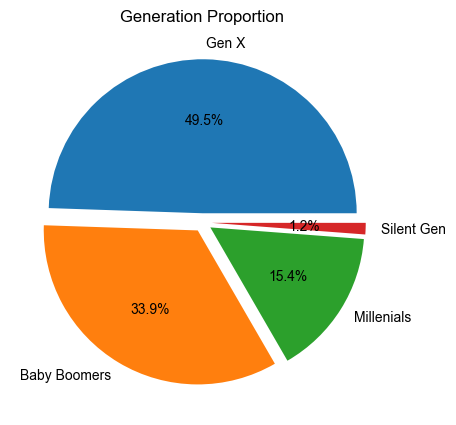

In [40]:
# Create Pie Chart of Generation

plt.figure(figsize=(6,5))
plt.title('Generation Proportion')
plt.pie(x=pieGen['Percentage'],
        labels=pieGen['Generation'],
        autopct=f'%1.1f%%',
        explode=(0.06,0.06,0.06,0.06))
sns.set_style('whitegrid')

In [95]:
# Gen X and Baby Boomers difference

49.5 -33.9

15.600000000000001

Dari hasil Piechart Generation Proportion bisa dilihat secara proporsi customer supermarket didominasi oleh Gen X dengan proporsi **hampir 50%** dengan total 1108 customer, dengan ini menandakan hampir setengah pangsa pasar adalah customer dengen rentang umur **42 -64 Tahun**. 

##### *Generation Purchase Freq*

Text(0, 0.5, 'Purchase Freq')

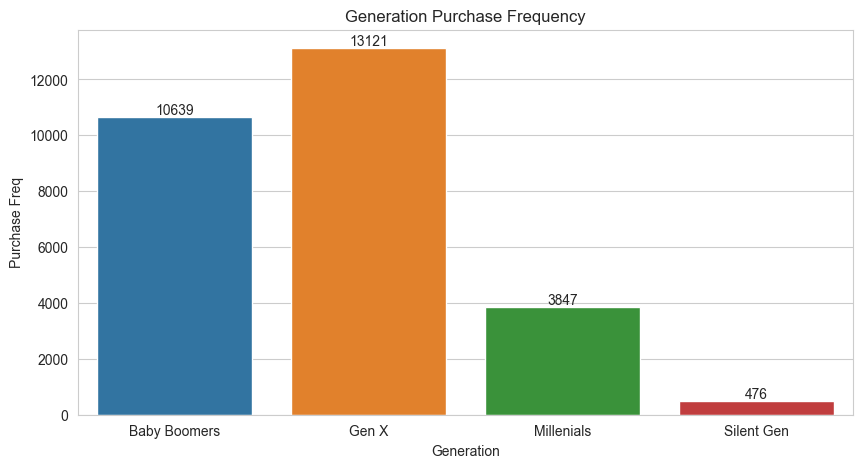

In [125]:
# Purchase Frequency

plt.figure(figsize=(10,5))
plt.title('Generation Purchase Frequency')
ax = sns.barplot(
    data=dfMC,
    x= 'Generation',
    y= 'PurchaseFreq',
    estimator=sum,
    ci=0)
sns.set_style('whitegrid')

# Add value labels to each bar

for bar in ax.containers[0]:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
            round(bar.get_height()),
            ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Generation')
ax.set_ylabel('Purchase Freq')

Dari hasil diatas terlihat frekuensi pembelian tertinggi adalah Gen X dengan total 13121 pembelian, disini terlihat Gen X lebih banyak melakukan pembelian berbanding sama dengan proporsi customer, namun terlihat Baby Boomers memiliki angka pembelian yang hanya selisih sedikit dengan Gen X sedangkan secara proporsi customer perbedaannya cukup besar yaitu 15%. Menandakan baby boomers memiliki frequency beli yang lebih tinggi yaitu 14 berbanding 12

In [107]:
print(f"Avg Purchase Freq Baby Boomers: {round(dfMC[dfMC['Generation'] == 'Baby Boomers']['PurchaseFreq'].mean())}")
print(f"Avg Purchase Freq Gen X: {round(dfMC[dfMC['Generation'] == 'Gen X']['PurchaseFreq'].mean())}")

Avg Purchase Freq Baby Boomers: 14
Avg Purchase Freq Gen X: 12


#### ***Income***

##### *Income Proportion*

In [42]:
# Create Income Data

pieInc = dfMC[['IncomeCategory']].value_counts()
pieInc = pd.DataFrame(pieInc,columns=['Count']).reset_index()

# Percentage of Income

pieInc['Percentage'] = (pieInc['Count'] / pieInc['Count'].sum()*100)
pieInc

,IncomeCategory,Count,Percentage
0,Lower,1151,51.383929
1,Middle,1083,48.348214
2,Upper,6,0.267857


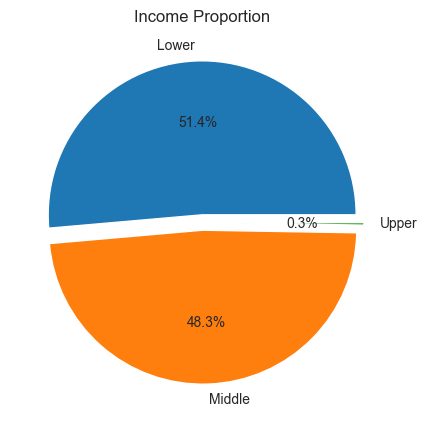

In [43]:
# Create Pie Chart

plt.figure(figsize=(6,5))
plt.title('Income Proportion')
plt.pie(x=pieInc['Count'],
        labels=pieInc['IncomeCategory'],
        autopct=f'%1.1f%%',
        explode=(0.05,0.05,0.05))
sns.set_style('whitegrid')

Proporsi Income pada piechart di menunjukan persentasi yang cukup signifikan, diungguli oleh **Lower Income** dengan **51.4%** dan persentase terendah cukup signifikan diduduki oleh **Upper Income** dengn **0.3**% atau sama dengan 6 orang dari total customer. Dengan ini menandakan lebih dari setengah proporsi customer memiliki penghasilan **dibawah angka $52,200** dan hanya sedikit yang berpenghasilan diatas $156,600

##### *Income Purchase Frequency*

Text(0, 0.5, 'Purchase Freq')

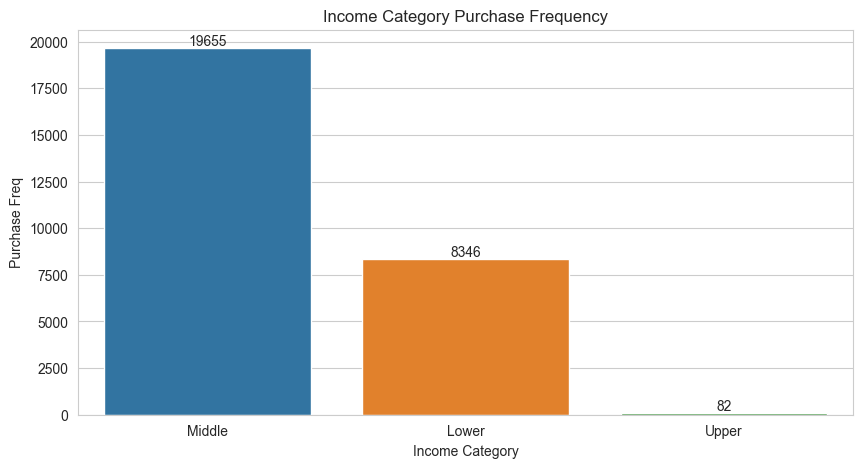

In [124]:
plt.figure(figsize=(10,5))
plt.title('Income Category Purchase Frequency')
ax = sns.barplot(
    data=dfMC,
    x= 'IncomeCategory',
    y= 'PurchaseFreq',
    estimator=sum,
    ci=0)
sns.set_style('whitegrid')

# Add value labels to each bar

for bar in ax.containers[0]:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
            round(bar.get_height()),
            ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Income Category')
ax.set_ylabel('Purchase Freq')

In [45]:
dfMC[dfMC['IncomeCategory']=='Middle']['PurchaseFreq'].sum()
dfMC[dfMC['IncomeCategory']=='Lower']['PurchaseFreq'].sum()

8346

Dari barplot diatas terlihat Middle Income mengungguli dengan **19655** pembelian, sedangkan sesuai dengan proporsinya Lower Income memiliki lebih banyak customer, menandakan intesitas pembelian atas proposi tertinggi masih tergolong rendah di angka **8346**

#### ***Education***

##### *Education Proportion*

In [46]:
# Create Education Data

pieEd = dfMC[['Education']].value_counts()
pieEd = pd.DataFrame(pieEd,columns=['Count']).reset_index()

# Percentage of Income

pieEd['Percentage'] = (pieEd['Count'] / pieEd['Count'].sum()*100)
pieEd

,Education,Count,Percentage
0,Graduation,1127,50.312500
1,PhD,486,21.696429
2,Master,370,16.517857
3,2n Cycle,203,9.062500
4,Basic,54,2.410714


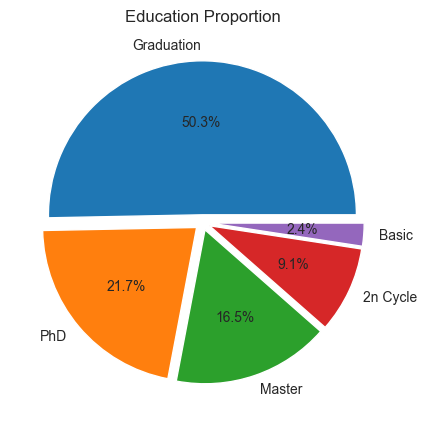

In [47]:
# Create Pie Chart

plt.figure(figsize=(6,5))
plt.title('Education Proportion')
plt.pie(x=pieEd['Count'],
        labels=pieEd['Education'],
        autopct=f'%1.1f%%',
        explode=(0.05,0.05,0.05,0.05,0.05))
sns.set_style('whitegrid')

Kategori graduation memiliki proporsi customer tertinggi secara demografi Education di angka 50.3% menandakan lebih dari setengah populasi data 

##### *Education Purchase Frequency*

Text(0, 0.5, 'Purchase Freq')

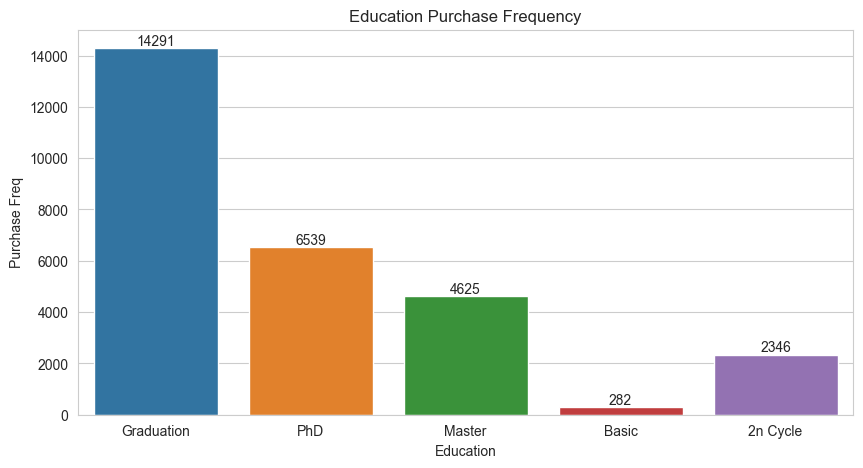

In [123]:
plt.figure(figsize=(10,5))
plt.title('Education Purchase Frequency')
ax = sns.barplot(
    data=dfMC,
    x= 'Education',
    y= 'PurchaseFreq',
    estimator=sum,
    ci=0)
sns.set_style('whitegrid')

# Add value labels to each bar

for bar in ax.containers[0]:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
            round(bar.get_height()),
            ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Education')
ax.set_ylabel('Purchase Freq')

Dari barplot diatas terlihat Graduation mengungguli dengan **14291** pembelian sesuai dengan proporsinya , menandakan lebih dari setengah pembelian didominasi oleh kategori Graduation

#### ***Household***

##### *Household Proportion*

In [49]:
# Create Household Data

pieHH = dfMC[['TotalHousehold']].value_counts()
pieHH = pd.DataFrame(pieHH,columns=['Count']).reset_index()

# Percentage of Income

pieHH['Percentage'] = (pieHH['Count'] / pieHH['Count'].sum()*100)
pieHH

,TotalHousehold,Count,Percentage
0,3,889,39.687500
1,2,764,34.107143
2,4,301,13.437500
3,1,254,11.339286
4,5,32,1.428571


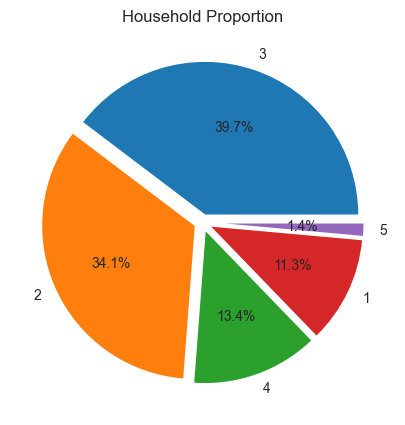

In [50]:
# Create Pie Chart

plt.figure(figsize=(6,5))
plt.title('Household Proportion')
plt.pie(x=pieHH['Count'],
        labels=pieHH['TotalHousehold'],
        autopct=f'%1.1f%%',
        explode=(0.05,0.05,0.05,0.05,0.05))
sns.set_style('whitegrid')

Pada piechart diatas terlihat secara proporsi kategori size 3 anggota rumah menempati proporsi terbesar dengan **39.7%** diikuti dengan 2 anggota rumah dan yang terkecil adalah 5 anggota rumah dengan hanya 1.4%

##### *Household Purchase Frequency*

Text(0, 0.5, 'Purchase Freq')

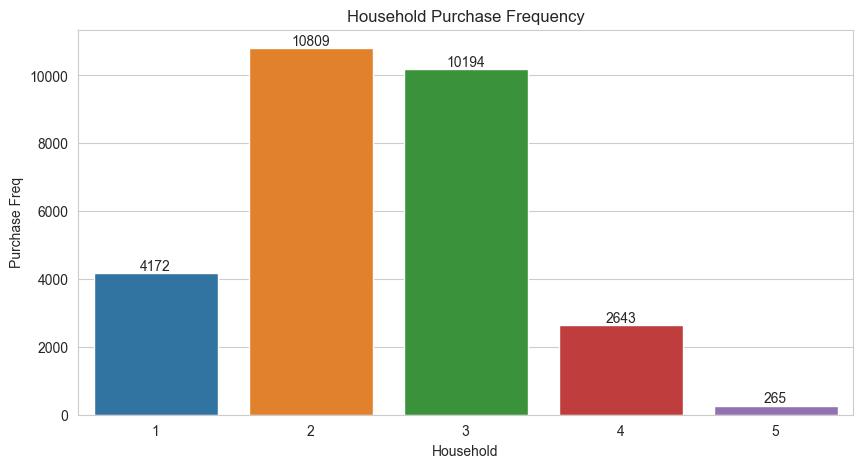

In [122]:
plt.figure(figsize=(10,5))
plt.title('Household Purchase Frequency')
ax = sns.barplot(
    data=dfMC,
    x= 'TotalHousehold',
    y= 'PurchaseFreq',
    estimator=sum,
    ci=0)
sns.set_style('whitegrid')

# Add value labels to each bar

for bar in ax.containers[0]:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
            round(bar.get_height()),
            ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Household')
ax.set_ylabel('Purchase Freq')

Hasil barplot diatas menunjukan bahwa pembelian 2 anggota rumah lebih sering dibandingkan 3 anggota rumah yang dimana pemegang proporsi terbesar, dengan selisih populasi **5.6%** tetapi 2 anggota rumah mencatat lebih sering berbelanja dengan **615 pembelian lebih banyak**

### *`RFM Analysis`*

RFM (Recency, Frequency, Monetary)
___
RFM Analysis adalah pendekatan untuk segementasi customer dengan menghituk score berdasarkan:
- **Recency** : Berapa lama setelah transaksi terakhir, dihitung dalam satuan hari
- **Frequency** : Secara historis, seberapa sering customer melakukan transaksi
- **Monetary** : Seberapa besar daya beli customer dilihat dari berapa total nominal transaksi<br><br>
Scoring ini akan memetakan customer sesuai perilaku yang terbentuk terhadap brand<br><br>
Sumber (https://clevertap.com/blog/rfm-analysis/)

#### ***RFM Proportion***

In [52]:
# Create Data

pieRFM = dfMC[['RFMSegment']].value_counts()
pieRFM = pd.DataFrame(pieRFM,columns=['Count']).reset_index()

# Percentage of Gen

pieRFM['Percentage'] = (pieRFM['Count'] / pieRFM['Count'].sum()) * 100
pieRFM

,RFMSegment,Count,Percentage
0,New Cust,686,30.625000
1,At Risk,672,30.000000
2,Can't Lose Them,563,25.133929
3,Potential Loyalists,294,13.125000
4,Champions,25,1.116071


Segmentasi pada RFM berikut ini adalah membagi klasifikasi berdasarkan penghitungan score RFM, yaitu:<br>
urutan dari tertinggi hingga terendah<br>
- **Score 5** ***Champions:*** mereka adalah customer terbaik, yang paling baru membeli, paling sering, dan merupakan pembelanja berat. Perhatian penuh untuk memaintain customer ini. Mereka dapat menjadi pengadopsi awal untuk produk baru dan akan membantu mempromosikan brand supermarket.<br><br>
- **Score 4** ***Potential Loyalists:*** mereka adalah customer yang juga berbelanja dalam waktu dekat ini dengan frekuensi rata-rata dan daya beli yang baik. pertimbangan untuk pawarkan program keanggotaan atau loyalitas atau rekomendasikan produk terkait untuk meningkatkan penjualan mereka dan bantu mereka menjadi kategori Champions.<br><br>
- **Score 3** ***New Customer:*** merekea adalah customer yang memiliki skor RFM keseluruhan yang tinggi tetapi tidak sering berbelanja. Pertimbangan membangun hubungan dengan customer ini dengan memberikan dukungan orientasi dan penawaran khusus untuk meningkatkan kunjungan mereka.<br><br>
- **Score 2** ***At Risk Customers:*** mereka adalah customer yang pernah membeli dan membelanjakan uang dalam jumlah besar, tetapi sudah lama tidak melakukan pembalian. Pertimbangan untuk customer ini dengan program kampanye pengaktifan kembali yang dipersonalisasi untuk terhubung kembali, dan tawarkan pembaruan dan produk bermanfaat untuk mendorong pembelian lagi.<br><br>
- **Score 1** ***Can’t Lose Them:*** merka adalah custoemr yang pernah mengunjungi dan membeli, tetapi belum pernah berkunjung belakangan ini. Bawa mereka kembali dengan promosi yang relevan, dan jalankan survei untuk mencari tahu apa yang salah dan hindari kehilangan mereka karena pesaing.<br><br>

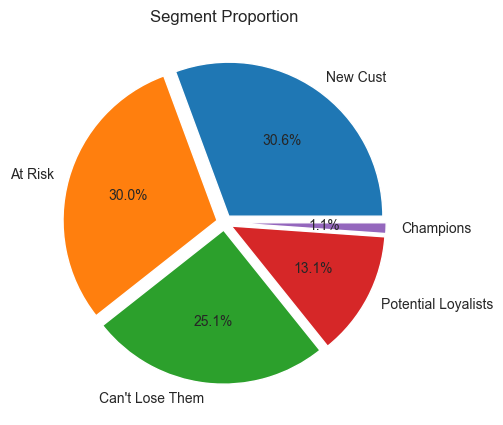

In [53]:
# Create Pie Chart of Generation

plt.figure(figsize=(6,5))
plt.title('Segment Proportion')
plt.pie(x=pieRFM['Percentage'],
        labels=pieRFM['RFMSegment'],
        autopct=f'%1.1f%%',
        explode=(0.05,0.05,0.05,0.05,0.05))
sns.set_style('whitegrid')

Hasil awal menggunakan visualisasi piechart menunjukan score RFM yang mana sebesar **30.6%** adalah segmentasi new customer diikut 30% adalah At Risk Customer dan 25.1%. Proporsi terendah adalah segmentasi Champions yaitu customer dgn score RFM tertinggi hanya **1.1%** dari keseluruhan. Dengan ini dapat terlihat area yang cukup potensial untuk campaign selanjutnya yang bisa ditargetkan ke segment dengan RFM score rendah yang secara total lebih dari setengah populasi costumer yaitu segementasi **At Risk dan Can't Lose Them**.<br>
Tujuan ditargetkan ke segmentasi terendah adalah untuk improvement score RFM dan meningkatkan segmentasi ke kategory Potential Loyalist atau lebih. 

#### ***RFM Generation***

Text(0, 0.5, 'Count')

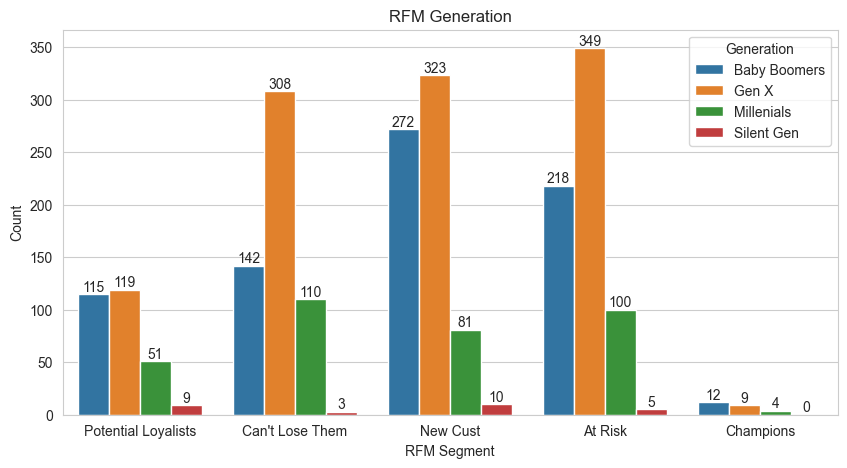

In [121]:
plt.figure(figsize=(10,5))
plt.title('RFM Generation')

ax = sns.countplot(
    data=dfMC,
    x= 'RFMSegment',
    hue='Generation')

sns.set_style('whitegrid')

# Add value labels to each bar
for i in range(0,4):
    for bar in ax.containers[i]:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                round(bar.get_height()),
                ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('RFM Segment')
ax.set_ylabel('Count')

Secara generasi, bisa dilihat Scoring RFM menunjukan 2 kategori score terendah ( At Risk dan Can't Lose Them) secara generasi diduduki oleh Gen X dan Baby Boomers dengan **lebih dari 200 customer**. Bisa dikatakan area yang tepat untuk menargetkan penginkatan segmentasi customer bisa ditujukan kepada Gen X dan kedua terhadap Baby Boomers, dilihat juga secara proporsi kedua generasi tersebut merupakan dua terbesar dalam populasi

#### ***RFM Income***

Text(0, 0.5, 'Count')

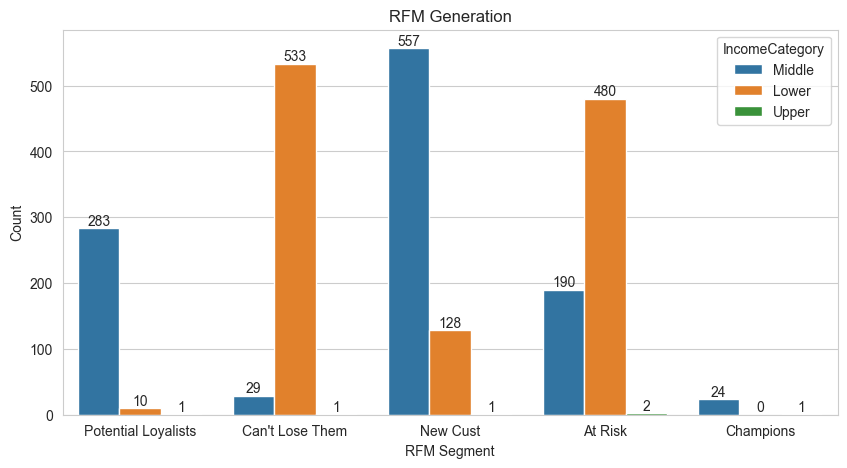

In [127]:
plt.figure(figsize=(10,5))
plt.title('RFM Generation')

ax = sns.countplot(
    data=dfMC,
    x= 'RFMSegment',
    hue='IncomeCategory')

sns.set_style('whitegrid')

# Add value labels to each bar
for i in range(0,3):
    for bar in ax.containers[i]:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                round(bar.get_height()),
                ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('RFM Segment')
ax.set_ylabel('Count')

Hasil RFM berdasarkan income menunjukan pola yang berbeda terhadap higher dan lower category dimana At Risk dan Can't Lose Them didominasi oleh **Lower Income** sedangkan di Tiga kategori teratas diduduki oleh **Middle Income**. Bisa dikatakan hasil ini menunjukan **semakin besar income** dari customer ada kemungkinan **memiliki RFM score yang lebih tinggi**

#### ***RFM Education***

Text(0, 0.5, 'Count')

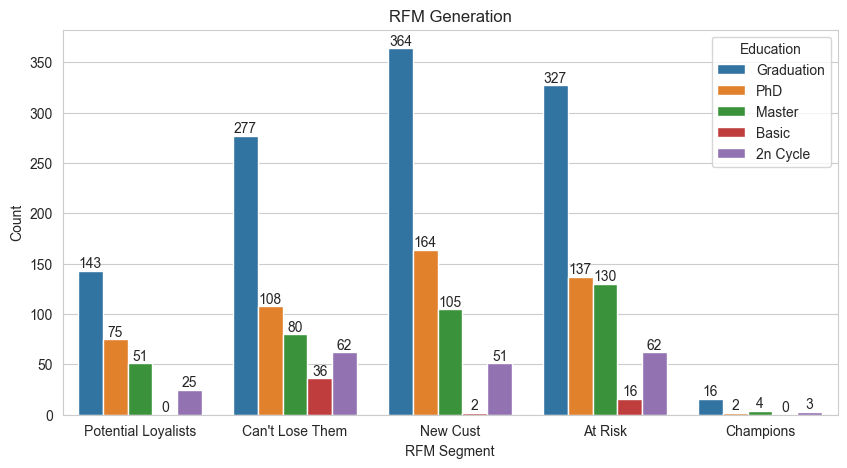

In [129]:
plt.figure(figsize=(10,5))
plt.title('RFM Generation')

ax = sns.countplot(
    data=dfMC,
    x= 'RFMSegment',
    hue='Education')

sns.set_style('whitegrid')
# Add value labels to each bar
for i in range(0,5):
    for bar in ax.containers[i]:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                round(bar.get_height()),
                ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('RFM Segment')
ax.set_ylabel('Count')

#### ***RFM Total Houshold***

In [57]:
dfMC.groupby(['RFMSegment','TotalHousehold'])[['ID']].count()

ID
RFMSegment          TotalHousehold     
At Risk             1               48 
                    2               179
                    3               316
                    4               115
                    5               14 
Can't Lose Them     1               25 
                    2               150
                    3               252
                    4               122
                    5               14 
Champions           1               5  
                    2               16 
                    3               4  
New Cust            1               113
                    2               282
                    3               234
                    4               53 
                    5               4  
Potential Loyalists 1               63 
                    2               137
                    3               83 
                    4               11

Text(0, 0.5, 'Count')

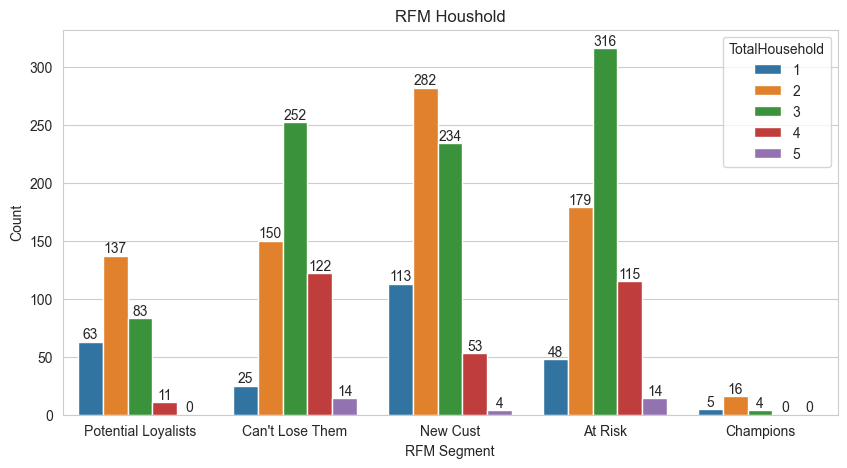

In [131]:
plt.figure(figsize=(10,5))
plt.title('RFM Houshold')

ax = sns.countplot(
    data=dfMC,
    x= 'RFMSegment',
    hue='TotalHousehold',)

sns.set_style('whitegrid')

# Add value labels to each bar
for i in range(0,5):
    for bar in ax.containers[i]:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                round(bar.get_height()),
                ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('RFM Segment')
ax.set_ylabel('Count')

Hasil RFM berdasarkan Total Household menunjukan 2 kategori terendah diungguli oleh Household size 3. Bisa dikatakan penargetan program untuk menaikan segmentasi customer secara besarnya anggota keluarga dirumah ditujukan kepada customer dengan 3 anggota keluarga

#### ***RFM Campaign Participation***

In [59]:
ctcamp1 = pd.crosstab(dfMC['RFMSegment'],dfMC['Campaign1'])
ctcamp2 = pd.crosstab(dfMC['RFMSegment'],dfMC['Campaign2'])
ctcamp3 = pd.crosstab(dfMC['RFMSegment'],dfMC['Campaign3'])
ctcamp4 = pd.crosstab(dfMC['RFMSegment'],dfMC['Campaign4'])
ctcamp5 = pd.crosstab(dfMC['RFMSegment'],dfMC['Campaign5'])
ctcamp6 = pd.crosstab(dfMC['RFMSegment'],dfMC['Campaign6'])

# Merge camp1 & camp2
rfmCamp = ctcamp1.merge(ctcamp2[[0,1]],on='RFMSegment')
rfmCamp.rename(columns={'0_x': 'NoCm1'},inplace=True)
rfmCamp.rename(columns={'1_x': 'YesCm1'},inplace=True)
rfmCamp.rename(columns={'0_y': 'NoCm2'},inplace=True)
rfmCamp.rename(columns={'1_y': 'YesCm2'},inplace=True)

# Merge camp3
rfmCamp = rfmCamp.merge(ctcamp3[[0,1]],on='RFMSegment')
rfmCamp.rename(columns={0: 'NoCm3'},inplace=True)
rfmCamp.rename(columns={1: 'YesCm3'},inplace=True)

# Merg camp4
rfmCamp = rfmCamp.merge(ctcamp4[[0,1]],on='RFMSegment')
rfmCamp.rename(columns={0: 'NoCm4'},inplace=True)
rfmCamp.rename(columns={1: 'YesCm4'},inplace=True)

# Merg camp5
rfmCamp = rfmCamp.merge(ctcamp5[[0,1]],on='RFMSegment')
rfmCamp.rename(columns={0: 'NoCm5'},inplace=True)
rfmCamp.rename(columns={1: 'YesCm5'},inplace=True)

# Merg camp6
rfmCamp = rfmCamp.merge(ctcamp6[[0,1]],on='RFMSegment')
rfmCamp.rename(columns={0: 'NoCm6'},inplace=True)
rfmCamp.rename(columns={1: 'YesCm6'},inplace=True)

rfmCamp
rfmCamp = rfmCamp.reset_index()
display(rfmCamp)

,RFMSegment,NoCm1,YesCm1,NoCm2,YesCm2,NoCm3,YesCm3,NoCm4,YesCm4,NoCm5,YesCm5,NoCm6,YesCm6
0,At Risk,656,16,669,3,631,41,638,34,664,8,592,80
1,Can't Lose Them,563,0,561,2,526,37,559,4,563,0,541,22
2,Champions,18,7,25,0,21,4,22,3,20,5,13,12
3,New Cust,618,68,671,15,632,54,599,87,602,84,562,124
4,Potential Loyalists,241,53,284,10,267,27,255,39,228,66,198,96


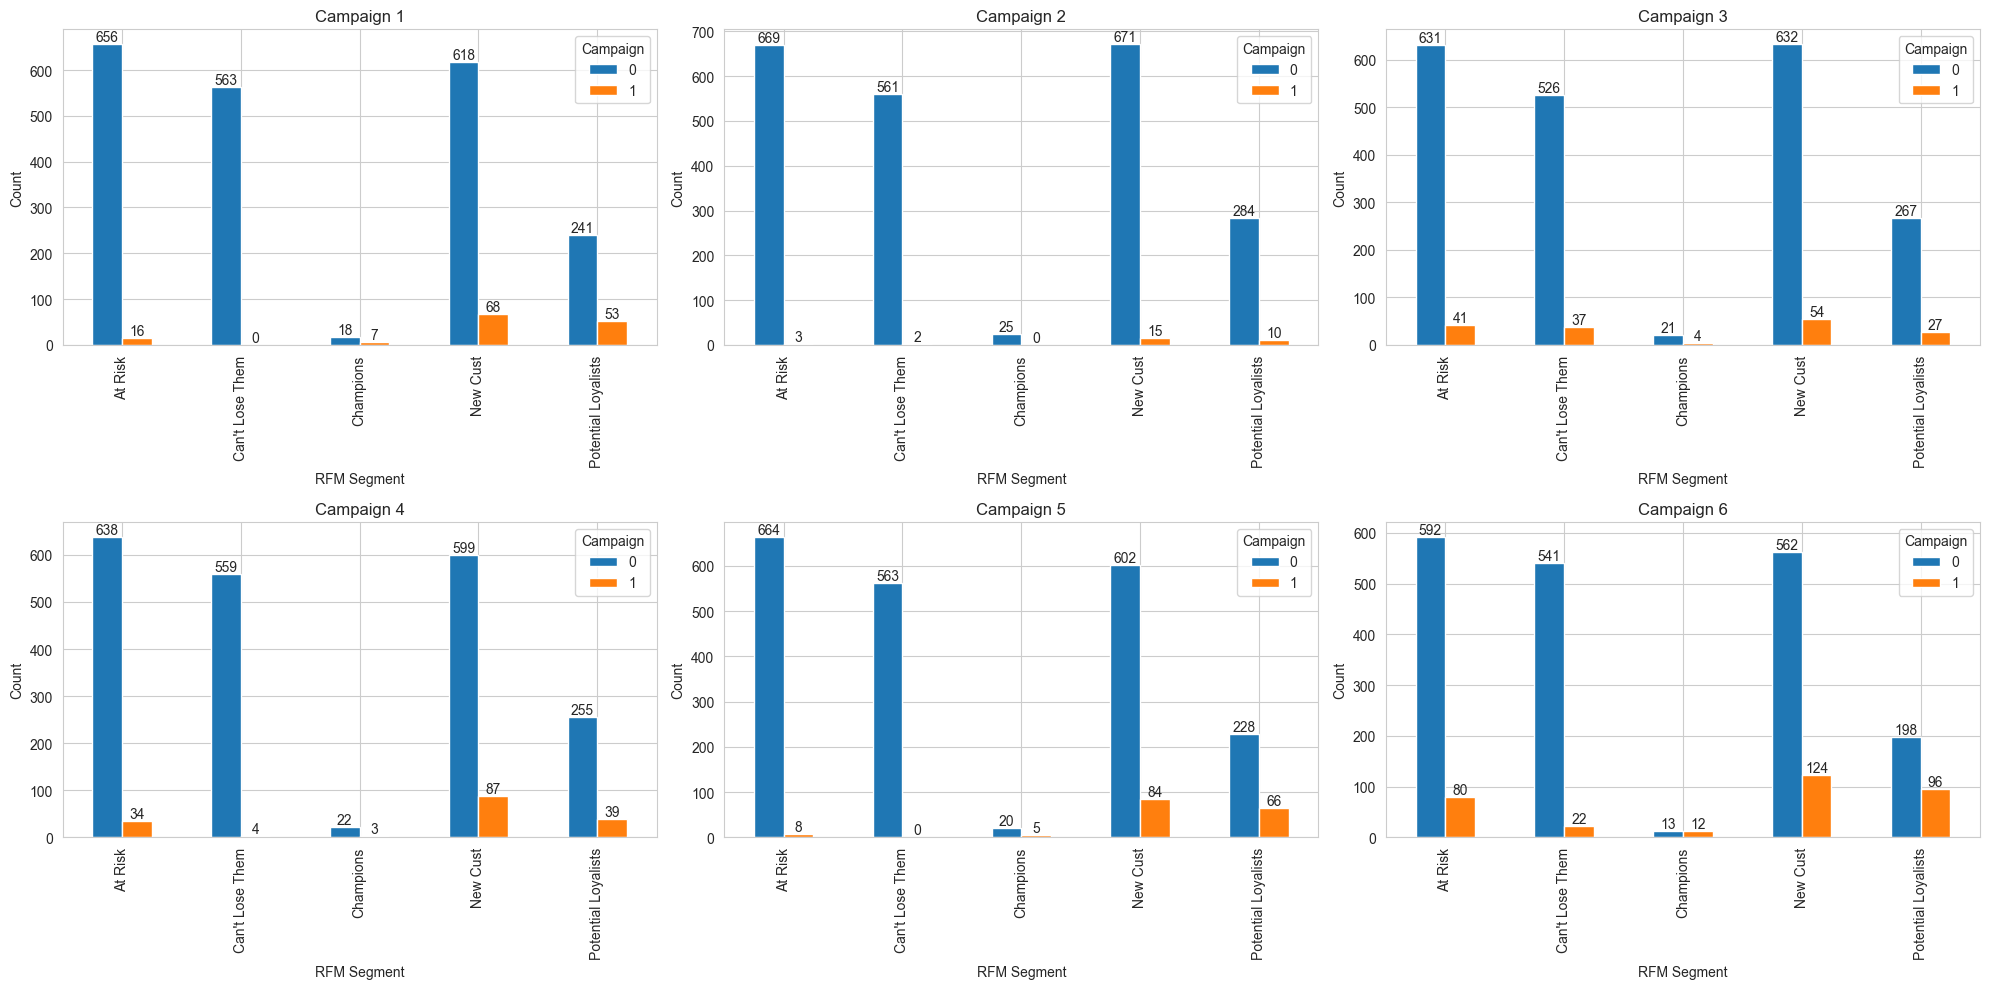

In [134]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

ax1 = ctcamp1.plot(kind='bar', ax=axes[0,0])
axes[0,0].set_xlabel('RFM Segment')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Campaign 1')
axes[0,0].legend(title='Campaign', bbox_to_anchor=(1, 1))

ax2 = ctcamp2.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_xlabel('RFM Segment')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Campaign 2')
axes[0,1].legend(title='Campaign', bbox_to_anchor=(1, 1))

ax3 = ctcamp3.plot(kind='bar', ax=axes[0,2])
axes[0,2].set_xlabel('RFM Segment')
axes[0,2].set_ylabel('Count')
axes[0,2].set_title('Campaign 3')
axes[0,2].legend(title='Campaign', bbox_to_anchor=(1, 1))

ax4 = ctcamp4.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_xlabel('RFM Segment')
axes[1,0].set_ylabel('Count')
axes[1,0].set_title('Campaign 4')
axes[1,0].legend(title='Campaign', bbox_to_anchor=(1, 1))

ax5 = ctcamp5.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_xlabel('RFM Segment')
axes[1,1].set_ylabel('Count')
axes[1,1].set_title('Campaign 5')
axes[1,1].legend(title='Campaign', bbox_to_anchor=(1, 1))

ax6 = ctcamp6.plot(kind='bar', ax=axes[1,2])
axes[1,2].set_xlabel('RFM Segment')
axes[1,2].set_ylabel('Count')
axes[1,2].set_title('Campaign 6')
axes[1,2].legend(title='Campaign', bbox_to_anchor=(1, 1))

# Add value labels to each bar
for i in range(0,2):
    for k in [ax1,ax2,ax3,ax4,ax5,ax6]:
        for bar in k.containers[i]:
            k.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                    round(bar.get_height()),
                    ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('RFM Segment')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

#### ***RFM Lowest Performance Segment***

##### *by Generation*

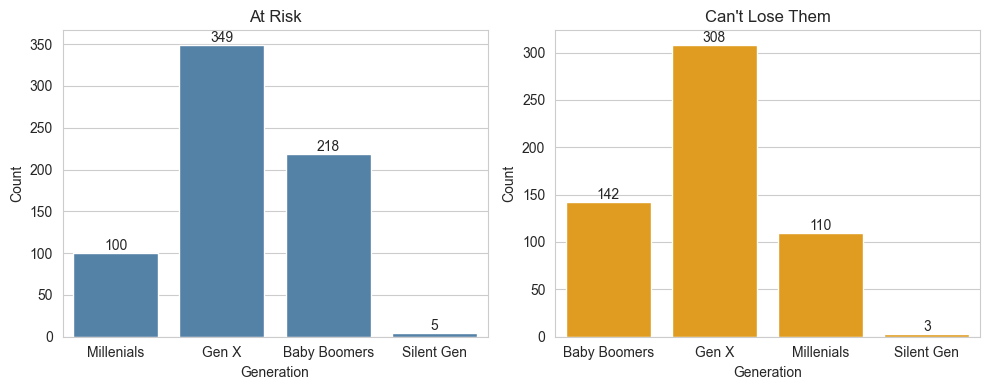

In [152]:
# DF RFM Low (At Risk and Can't Lose Them)

RFMLow = dfMC[dfMC['RFMSegment'].isin(["At Risk","Can't Lose Them"])]

# Create Bar

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax1 = sns.barplot(data=RFMLow[RFMLow['RFMSegment']=='At Risk'], ax=axes[0],
            x='Generation',
            y='ID',
            estimator=len,color='steelblue')
axes[0].set_title('At Risk')

ax2 = sns.barplot(data=RFMLow[RFMLow['RFMSegment']=="Can't Lose Them"], ax=axes[1],
            x='Generation',
            y='ID',
            estimator=len,color='orange')
axes[1].set_title("Can't Lose Them")

# Add value labels to each bar
for i in range(0,1):
    for k in [ax1,ax2]:
        for bar in k.containers[i]:
            k.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                    round(bar.get_height()),
                    ha='center', va='bottom')            
            # Set labels and title
            k.set_xlabel('Generation')
            k.set_ylabel('Count')

plt.tight_layout()
plt.show()


Secara generasi, bisa dilihat Scoring RFM menunjukan 2 kategori score terendah ( At Risk dan Can't Lose Them) secara generasi diduduki oleh Gen X dan Baby Boomers dengan **lebih dari 200 customer**. Bisa dikatakan area yang tepat untuk menargetkan penginkatan segmentasi customer bisa ditujukan kepada Gen X dan kedua terhadap Baby Boomers, dilihat juga secara proporsi kedua generasi tersebut merupakan dua terbesar dalam populasi

##### *by Income*

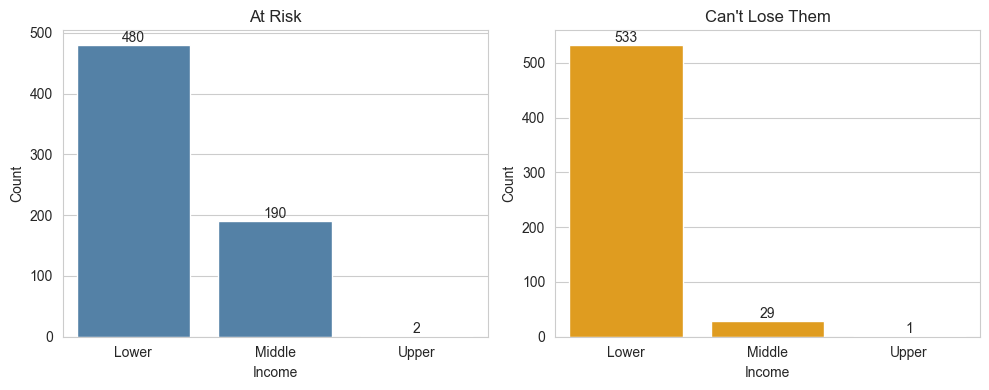

In [151]:
# Create Bar

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax1 =sns.barplot(data=RFMLow[RFMLow['RFMSegment']=='At Risk'], ax=axes[0],
            x='IncomeCategory',
            y='ID',
            estimator=len, color='steelblue')
axes[0].set_title('At Risk')

ax2 = sns.barplot(data=RFMLow[RFMLow['RFMSegment']=="Can't Lose Them"], ax=axes[1],
            x='IncomeCategory',
            y='ID',
            estimator=len, color='orange')
axes[1].set_title("Can't Lose Them")

# Add value labels to each bar
for i in range(0,1):
    for k in [ax1,ax2]:
        for bar in k.containers[i]:
            k.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                    round(bar.get_height()),
                    ha='center', va='bottom')            
            # Set labels and title
            k.set_xlabel('Income')
            k.set_ylabel('Count')

plt.tight_layout()
plt.show()

Hasil RFM berdasarkan income menunjukan pola yang berbeda terhadap higher dan lower category dimana At Risk dan Can't Lose Them didominasi okeh **Lower Income** sedangkan di Tiga kategori teratas diduduki oleh **Middle Income**. Bisa dikatakan hasil ini menunjukan **semakin besar income** dari customer ada kemungkinan **memiliki RFM score yang lebih tinggi**

In [137]:
# Correlation Check

corrRI = round(dfMC['Income'].corr(dfMC['RFMScore'])*100,1)
print(f'Korelasi Income dan RFM Score: {corrRI}%')

Korelasi Income dan RFM Score: 69.6%


#### ***RFM Highest Performance Segment***

##### *by Generation*

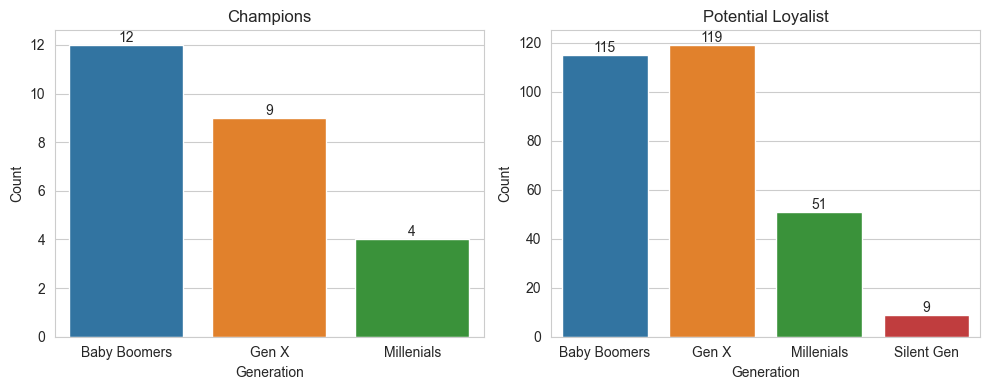

In [150]:
RFMHigh = dfMC[dfMC['RFMSegment'].isin(['Champions','Potential Loyalists'])]

# Create Bar

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax1 = sns.barplot(data=RFMHigh[RFMHigh['RFMSegment']=='Champions'], ax=axes[0],
            x='Generation',
            y='ID',
            estimator=len)
axes[0].set_title('Champions')

ax2 = sns.barplot(data=RFMHigh[RFMHigh['RFMSegment']=='Potential Loyalists'], ax=axes[1],
            x='Generation',
            y='ID',
            estimator=len)
axes[1].set_title('Potential Loyalist')

# Add value labels to each bar
for i in range(0,1):
    for k in [ax1,ax2]:
        for bar in k.containers[i]:
            k.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                    round(bar.get_height()),
                    ha='center', va='bottom')            
            # Set labels and title
            k.set_xlabel('Generation')
            k.set_ylabel('Count')

plt.tight_layout()
plt.show()

Secara generasi, bisa dilihat Scoring RFM menunjukan 2 kategori score tertinggi yaitu Champions dan Potential loyalist yang dimana didominasi oleh generasi Gen X dan Baby Boomers. Pada visualisasi diatas dapat dilihat bahwa generasi Millenial memiliki angka yang cukup signifikan dibawah Gen X dan Baby Boomers, dapat dinyatakan terdapat area untuk improvement untuk mempertahankan dan menaikan angka generasi Millenials.

##### *by Income*

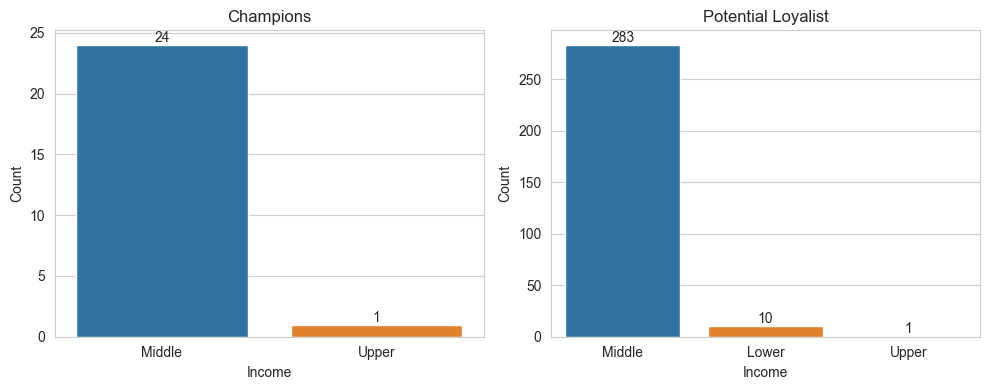

In [149]:
# Create Bar

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax1 = sns.barplot(data=RFMHigh[RFMHigh['RFMSegment']=='Champions'], ax=axes[0],
            x='IncomeCategory',
            y='ID',
            estimator=len)
axes[0].set_title('Champions')

ax2 = sns.barplot(data=RFMHigh[RFMHigh['RFMSegment']=='Potential Loyalists'], ax=axes[1],
            x='IncomeCategory',
            y='ID',
            estimator=len)
axes[1].set_title('Potential Loyalist')

# Add value labels to each bar
for i in range(0,1):
    for k in [ax1,ax2]:
        for bar in k.containers[i]:
            k.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                    round(bar.get_height()),
                    ha='center', va='bottom')
            # Set labels and title
            k.set_xlabel('Income')
            k.set_ylabel('Count')

plt.tight_layout()
plt.show()

Pada plot diatas sangat terlihat perbedaan yang signifikan untuk kategori middle income dibanding lower dan upper. Disini terlihat potensi yang besar untuk mempertimbangkan Lower income sebagai target kategori untuk improvement

### *`Campaign Analysis`*

#### ***Overall Campaign Participation***

In [65]:
campaignPart = dfMC[['Campaign1','Campaign2','Campaign3','Campaign4','Campaign5','Campaign6']].sum()
campaignPart = pd.DataFrame(campaignPart,columns=['Yes'])
campaignPart['No'] = len(dfMC) - campaignPart['Yes']
campaignPart

,Yes,No
Campaign1,144,2096
Campaign2,30,2210
Campaign3,163,2077
Campaign4,167,2073
Campaign5,163,2077
Campaign6,334,1906


Text(0, 0.5, 'Count')

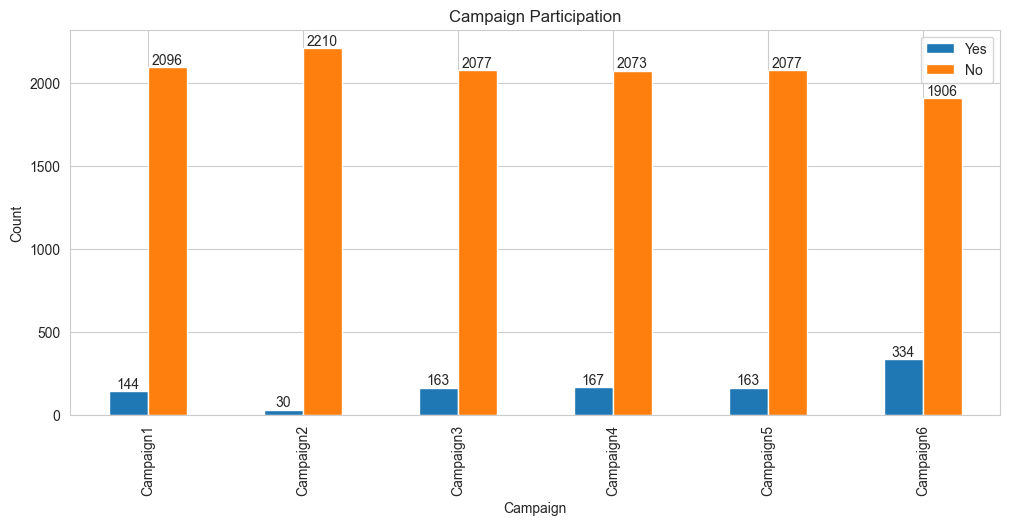

In [159]:
# Create barplot

ax = campaignPart.plot(kind='bar', figsize=(12,5),
                  title='Campaign Participation')

# Add value labels to each bar
for i in range(0,2):
    for bar in ax.containers[i]:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                round(bar.get_height()),
                ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Campaign')
ax.set_ylabel('Count')


#### ***Generation Campaign Participation***

In [67]:
genCamp = dfMC.groupby('Generation')[['Campaign1','Campaign2','Campaign3','Campaign4','Campaign5','Campaign6']].sum()
genCamp

,Campaign1,Campaign2,Campaign3,Campaign4,Campaign5,Campaign6
Generation,,,,,,
Baby Boomers,60,13,41,71,53,107
Gen X,52,12,83,74,62,150
Millenials,30,5,36,20,43,71
Silent Gen,2,0,3,2,5,6


<Axes: >

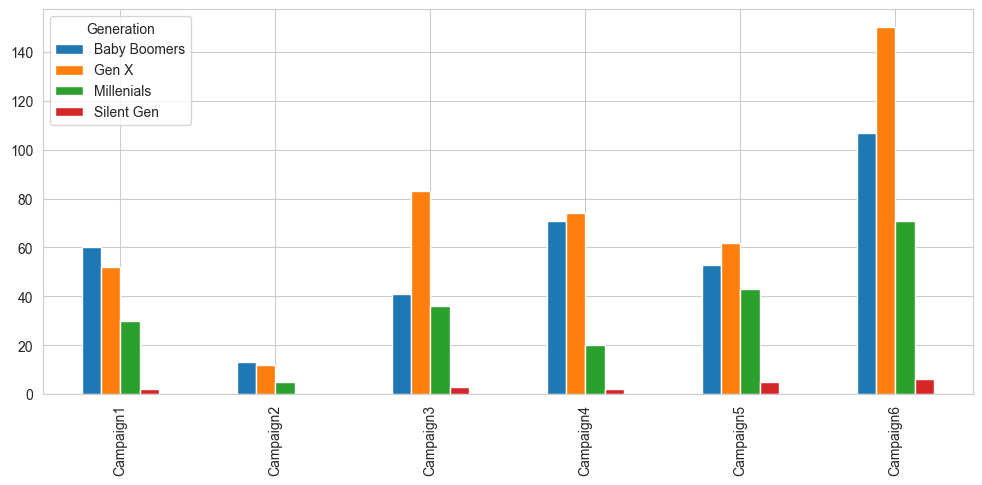

In [68]:
genCamp.T.plot(kind='bar',figsize=(12,5))

#### ***Income Campaign Participation***

In [69]:
incomeCamp = dfMC.groupby('IncomeCategory')[['Campaign1','Campaign2','Campaign3','Campaign4','Campaign5','Campaign6']].sum()
incomeCamp

,Campaign1,Campaign2,Campaign3,Campaign4,Campaign5,Campaign6
IncomeCategory,,,,,,
Lower,6,4,94,29,2,129
Middle,138,26,69,138,161,205
Upper,0,0,0,0,0,0


<Axes: >

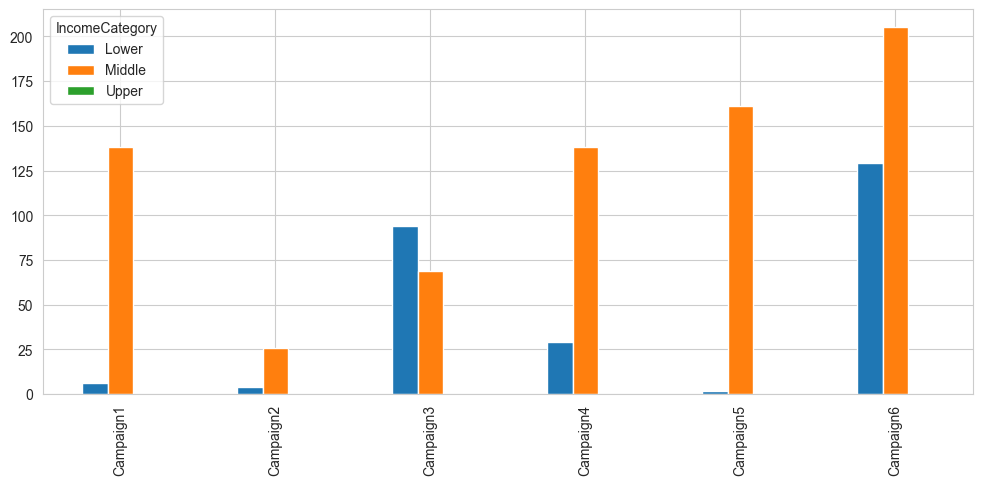

In [70]:
incomeCamp.T.plot(kind='bar',figsize=(12,5))

#### ***Education Campaign Participation***

In [71]:
eduCamp = dfMC.groupby('Education')[['Campaign1','Campaign2','Campaign3','Campaign4','Campaign5','Campaign6']].sum()
eduCamp

,Campaign1,Campaign2,Campaign3,Campaign4,Campaign5,Campaign6
Education,,,,,,
2n Cycle,14,2,15,10,10,22
Basic,0,0,6,0,0,2
Graduation,82,16,78,81,86,152
Master,18,2,24,31,28,57
PhD,30,10,40,45,39,101


<Axes: >

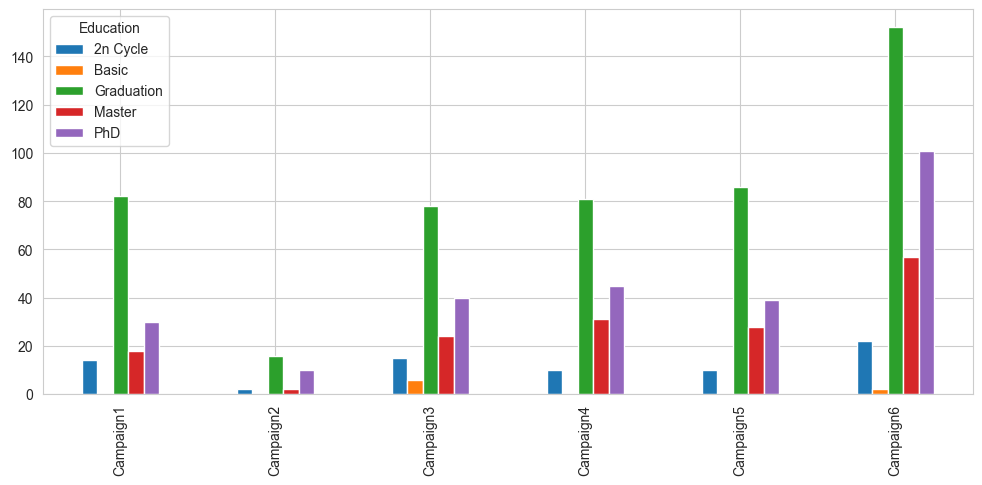

In [72]:
eduCamp.T.plot(kind='bar',figsize=(12,5))

#### ***Household Campaign Participation***

In [73]:
hhCamp = dfMC.groupby('TotalHousehold')[['Campaign1','Campaign2','Campaign3','Campaign4','Campaign5','Campaign6']].sum()
hhCamp

,Campaign1,Campaign2,Campaign3,Campaign4,Campaign5,Campaign6
TotalHousehold,,,,,,
1,41,9,21,32,46,102
2,74,10,58,62,97,116
3,24,9,64,56,18,91
4,3,2,20,16,1,24
5,2,0,0,1,1,1


<Axes: >

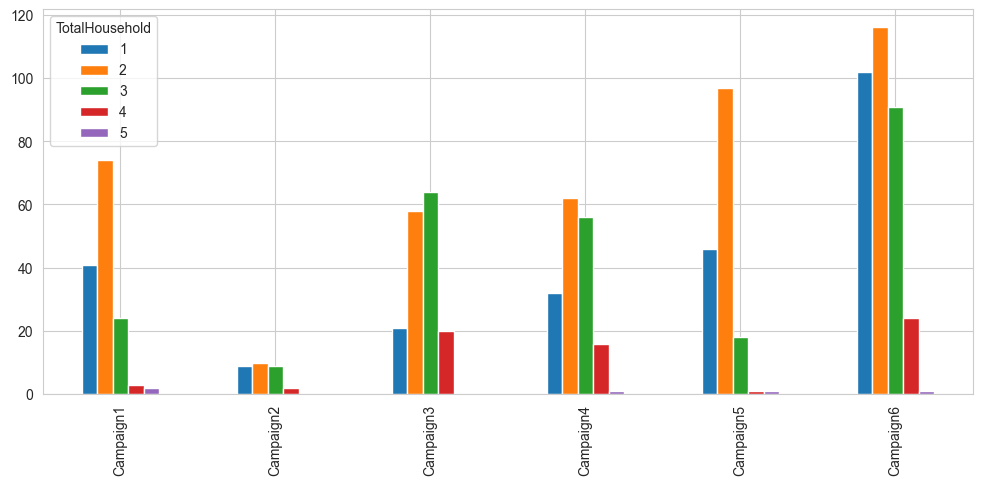

In [74]:
hhCamp.T.plot(kind='bar',figsize=(12,5))

#### ***RFM Campaign Participation***

In [75]:
rfmCampPart =  dfMC.groupby('RFMSegment')[['Campaign1','Campaign2','Campaign3','Campaign4','Campaign5','Campaign6']].sum()
rfmCampPart

,Campaign1,Campaign2,Campaign3,Campaign4,Campaign5,Campaign6
RFMSegment,,,,,,
At Risk,16,3,41,34,8,80
Can't Lose Them,0,2,37,4,0,22
Champions,7,0,4,3,5,12
New Cust,68,15,54,87,84,124
Potential Loyalists,53,10,27,39,66,96


<Axes: >

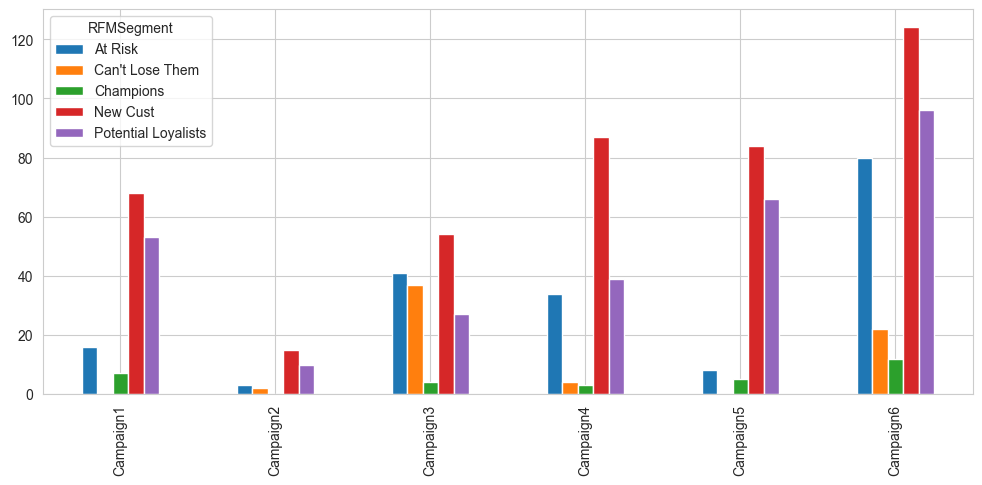

In [76]:
rfmCampPart.T.plot(kind='bar',figsize=(12,5))

### *`Channel Analysis`*

#### ***Deals/Discount Purchase Proportion***

Discount purchase percentage: 97.9%


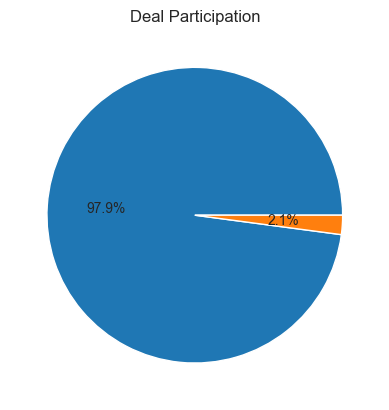

In [77]:
# Count disc purchase percentage

discPct = round(dfMC[dfMC['DiscPurchases']!=0]['DiscPurchases'].count() / len(dfMC) * 100,1)

print(f'Discount purchase percentage: {discPct}%')

pieDisc = pd.DataFrame([discPct,100-discPct])

plt.title('Deal Participation')

plt.pie(x=pieDisc[0],
        autopct=f'%1.1f%%',)
sns.set_style('whitegrid')

#### ***Channel Proportion***

In [78]:
channelsProp = dfMC[['WebPurchases','CatalogPurchases','StorePurchases']].sum()
channelsProp = pd.DataFrame(channelsProp,columns=['Count']).reset_index()

# Create percentage
channelsProp['Percentage'] = (channelsProp['Count'] / channelsProp['Count'].sum()) * 100
channelsProp

,index,Count,Percentage
0,WebPurchases,9150,32.581989
1,CatalogPurchases,5963,21.233486
2,StorePurchases,12970,46.184524


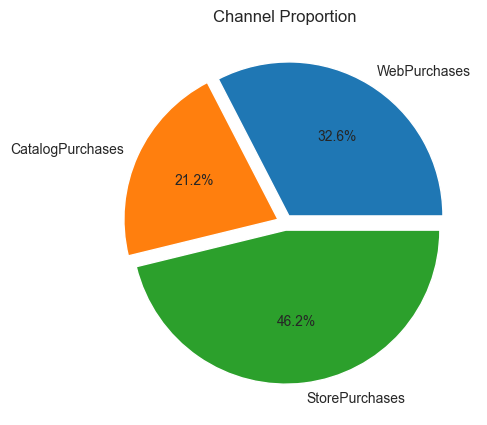

In [79]:
# Create Pie Chart of Generation

plt.figure(figsize=(6,5))
plt.title('Channel Proportion')
plt.pie(x=channelsProp['Percentage'],
        labels=channelsProp['index'],
        autopct=f'%1.1f%%',
        explode=(0.05,0.05,0.05))
sns.set_style('whitegrid')

#### ***Generation Channel***

In [80]:
channelGen =  dfMC.groupby('Generation')[['WebPurchases','CatalogPurchases','StorePurchases']].sum()
channelGen

,WebPurchases,CatalogPurchases,StorePurchases
Generation,,,
Baby Boomers,3374,2433,4832
Gen X,4440,2554,6127
Millenials,1170,855,1822
Silent Gen,166,121,189


<Axes: title={'center': 'Channel Generation'}>

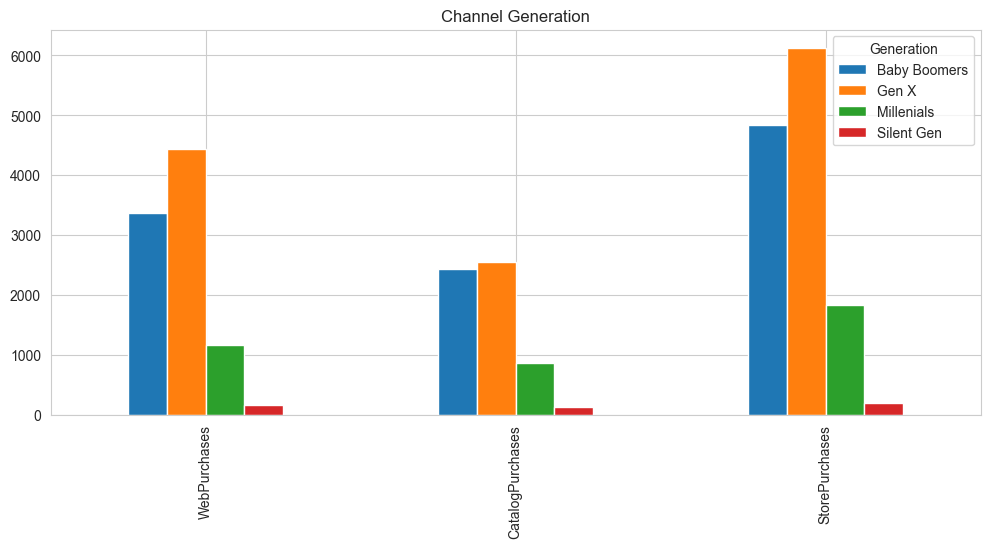

In [81]:
channelGen.T.plot(kind='bar',figsize=(12,5),
                  title='Channel Generation')

## **Conclusion and Recommendation**

### *`Conclusion`*

- Dari hasil penilaian dan segmentasi menggunakan analisa RFM, didpatkan dua segmentasi terendah secara proporsi diatal 50% dari populasi
- 30% At Risk dan 25.1% Can't Lose Them
- Secara potensi bisa lebih ditargetkan kepada kategori At Risk, customer dengan kategori ini bisa lebih mudah dijangkau dibanding Can't Lose Them
- Diasumsikan kategori Can't Lose Them adalah customer yang memang hanya melakukan pembelian dengan kebutuhan tertentu dan mendesak jadi tidak ada kecenderungan untuk menjadi custoemr tetap
- 97.9% customer berpartisipasi dalam penjualan dengan discount, salah satu cara terbaik untuk program campaign adalah dengan mengadakan discount sesuai dengan target demografi
- Channel penjualan terbesar yaitu Store, sesuai juga dengan target kepada Gen X yang juga berkontribusi besar dalam Channel Store

### *`Recommendation`*

- Segmentasi customer yang perlu diperhatikan utuk menaikan segmentasi berdasarkan score RFM adalah **At Risk dan Can't Lose Them**
    - Secara generasi proporsi terbanyak adalah Gen X dan Baby Boomers
    - Untuk Campaign selanjutnya bisa merujuk pada channel Store dimana kedua tersebut adalah yang paling banyak digunakan oleh Baby Boomers
    - Strategi Campaign menggunakan produk dan personalisasi sesuai dengan generasinya
    - Mengadakan program loyalitas mempership untuk memperbaiki nilai frequency dan recency<br><br>
- Segmentasi customer yang perlu dimaintain utuk memepertahankan segmentasi berdasarkan score RFM adalah **Potential Loyalists**
    - Secara proporsi pada walaupun potential loyalist ada diurutan kedua
    - Mengadakan rewarding untuk big spender dan total frekuensi belanja untuk tetap mempertahankan angka modetary dan frekuensi yang tinggi
